## Professor Quality Classification using Data from Rate My Professors (RMP)
Project Members (uniqname): Casper Guo (casperg), Jack Yu (yuwenjin), Manheng Wang (manhengw), Jiawei Hao (hjiawei), Steve Fan (stevefan)

### Table of Contents
1. [Setup and Sample Data](#setup-and-sample-data)
2. [Project Description](#project-description)
    - [Motivation](#motivation)
3. [Related Work](#related-work)
    - [SVM Sentiment Analysis](#svm-sentiment-analysis)
    - [Other Related References](#other-related-references)
4. [Data](#data)
    - [Step One](#step-one)
    - [Step Two](#step-two)
    - [Interesting Data Samples](#interesting-data-samples)
5. [Method](#method)

### Setup and Sample Data

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
prof_file_path = "Data/clean_prof_info.csv"
comment_file_path = "Data/clean_ratings.csv"


In [7]:
df_prof = pd.read_csv(prof_file_path)
df_comment = pd.read_csv(comment_file_path, parse_dates=["date"])

In [8]:
df_comment.head()

,profID,attendanceMandatory,class,comment,date,difficultyRating,grade,helpfulRating,isForCredit,isForOnlineClass,ratingTags,wouldTakeAgain
0,7964,False,ANTHRCUL101,Fricke is the man. Entire class probably took ...,2019-04-28 17:13:12,1.0,A,5.0,False,False,"['Respected', 'Inspirational', 'Amazing Lectur...",True
1,7964,False,ANTHRO101,Tom Fricke is one of those professors you will...,2019-01-08 18:41:24,1.0,A+,5.0,False,False,"['Accessible Outside Class', 'Hilarious', 'Ama...",True
2,7964,False,ANTHRCUL101,Prof. Fricke is amazing. He is hilarious and t...,2018-12-16 03:11:18,1.0,A,5.0,False,False,"['Hilarious', 'Graded By Few Things', 'Caring']",True
3,7964,False,CULTANTHRO101,Such an easy class. Exams were exactly like th...,2018-12-12 10:03:19,1.0,A,5.0,False,False,"['Accessible Outside Class', 'Graded By Few Th...",True
4,7964,False,ANTHRCUL101,Easiest class i have taken at UM. The exams to...,2018-12-11 16:33:00,1.0,A+,5.0,False,False,"['Respected', 'Hilarious', 'Amazing Lectures']",True


### Project Description

In this project, we are investigating the relationship between reviews on Rate My Professors and how well the Professor is rated, which will be expressed as either good or bad with a cutoff boundary. We will be specficially investigating a dataset we scraped containing information about professors and their ratings at the University of Michigan. Using this dataset, we will be building a machine learning model that uses Support Vector Machines (SVMs) to study the sentiment conveyed by the comments (used interchangeably with reviews in this project) students gave to professors and use it to predict the overall quality of a professor.

Some interesting questions we want to investigate:
- To what extent does the language of a positive review differ from that of a negative review?
- To what extent does the overall frequency of positive and negative words affect the average rating?
- How much does an overly positive or negative review affect the professor's overall assessment?

#### Motivation

As students at the University of Michigan, we would like to get more information about our education and ensure that we make the most out of it. To that end, many students like ourselves turn to RateMyProfessors.com to get a sense of how it may be studying under a particular professor, where you can look at the average rating, difficulty, and comments to determine if this is the right professor for you.

However, a site like RateMyProfessors is not always the easiest to absorb information from. Here are some examples from our experiences with the website:
- Very few comments. We do not know how trustworthy the average rating is, but we do have the comment of the few reviewers.
- Most comments are short and give average ratings, but a small group of comments are long and overwhelmingly positive. Who should we trust?
- Comments that contain a lot of negative language (e.g. hard, difficult, complicated) but have an overall positive rating. How much can a good professor make a course easier?

Due to these issues, we want to train an SVM to perform sentiment anaysis, which will leverage data from many professors to determine the most suitable rating for a given professor. This is likely to be the most effective on professors with little data, where the language of the few comments will allow our model to produce a more accurate rating for the professor than the average rating. 

This project will hopefully allow us to be able to make better choices when choosing courses and professors in the future without having to sacrifice a lot of time reading through each comment for a professor, which can be especially cumbersome for professors with many ratings.

### Related Work

#### SVM sentiment analysis
After collecting all the data we need, we proposed to use students `comment` to predict how popular a professor is. (Our idea referred to the first document linked in the reference section) Here are several steps we would do:
- we would need to split the entire dataset ***(clean_ratings.csv)*** into training set and testing set. 
- we would manually label the training set data identifying how poplular each professor is by using `avgRating` parameter in ***(clean_prof_info.csv)*** :
- Since this parameter is numerical, we would set a threshhold to indentify (popular, not popular). We would set the threshold to `avgRating = 3.9` (the **median** of `avgRating`) 
- Vectorize the original comments by calculating **TF-IDF** and convert comments into a weighting matrix.
- Creating a Linear SVM Model, package referencing [Sentiment Analysis using SVM](https://medium.com/@vasista/sentiment-analysis-using-svm-338d418e3ff1)
- Lastly, we would test how good our model is by predicting the rest of testing data and compare the result with the original `avgRating` parameter and threshold.

#### Other related references:
- https://medium.com/@vasista/sentiment-analysis-using-svm-338d418e3ff1
- https://aclanthology.org/W04-3253.pdf
- https://link.springer.com/article/10.1007/s42452-020-2266-6
- https://github.com/Nobelz/RateMyProfessorAPI (_Note: we didn't use any code from this repo, but this is still a good reference_)

### Data

The source of the data is from [Rate My Professor](https://www.ratemyprofessors.com/search/teachers?query=*&sid=1258), a website where students can give anoymous and objective opinions about their professors. To gather out dataset, we took several steps.

#### Step One
First, we want to know how many UofM professors are recorded on the website. In particular, we want to find a list of professor names and their unique IDs respectively. In order to do this, we find all professors in UofM by applying school filter on the website. There are more than 5000 unique results for UofM professors. However, not all results were shown. We need to keep on clicking "Show More" button on the website to show more result. To do this more easily, we wrote a script "scraper.py" that utilizes python selenium library to click the button for us. The process of parsing the names were not very smooth. The script was interrupted a couple time due to denial of service by the website. We ended up parsing around 4000 professor names after about 610 clicks. And eventually we obtained around 4600 professor IDs from the names scraped (multiple professors can have the same name).

#### Step Two
After getting professor IDs, we were able to retrieve other information as well. In data_acquisition.py, we iteratively made POST requests to the ratemyprofessor.com to retrieve raw information such as comments, ratings, subject name, and professor names. Then we did some data cleaning in data_cleaning.ipynb and put separated data into two CSV files: clean_prof_info.csv and clean_ratings.csv. clean_prof_info.csv contains 4612 rows and 8 columns of data:

```profID```: Professor IDs.  
```avgDifficulty```: Average diffculty score rated for a professor.  
```avgRating```: Average rating for a professor.  
```department```: The department a professor is from.  
```firstName```: Professor's first name.  
```lastName```: Professor's last name.  
```numRatings```: Number of ratings this professor has.  
```wouldTakeAgainPercent```: Percent of students who rated this professor that would take the his/hers class again.  
```fullName```: Professor's full name.  

clean_ratings.csv contains 52245 rows and 12 columns of data:

```profID```: Professor IDs.  
```attendanceMandatory```: Whether a class is mandatory for attendance.  
```class```: The class number.  
```comment```: The comment student wrote.  
```date```: The data the comment was wrote.  
```difficultyRating```: The difficulty of the class given by the student.  
```grade```: Student's grade in that class.  
```helpfulRating```: How helpful student think the professor was.  
```isForCredit```: Is the class for credit.  
```isForOnlineClass```: Is class remote.  
```ratingTags```: Tags given by the student.  
```wouldTakeAgain```: If the student would take the class again.  




#### Interesting Data Samples

First sample we examine utilizes data from 10 department with highest number of ratings. We think this sample would be useful because we would later build a machine learning model that examines whether the sentiment of a comment is positive or negative; the rating given by the students matter in this case since the rating score ranges fromn 1-5 with a segment of 0.1, the score itself is also objective, thus, we could need a boundry to define whether the sentiment under a particular range of ratings is positive, neutral, or negative. 

We decided to pick 10 department with highest number of rating because they have a rather complete data sample with a variety of ranges. The median of the rating is 3.9, which can be used as a general boundry. However, such use of boundry can be not representative in some cases as there are bias among university department. For instance, one department is less funded than another, resulting in fewer teaching resources and utimately led to bad ratings. 

Another interesting observation can be made from the box-plot. If we divide department into STEM group (subject related to science, technology, engineering, and mathematics) and non STEM group (in this case that would be Psychology, English, Social Work, Spanish, Political Science, and History), we noticed that STEM group has a noticable lower rating on average than non STEM group (median of 3.6 comparing to a median of 4.0).

In [16]:
df_depart = df_prof['department'].value_counts()
top_depart = df_depart.head(10).index.tolist()
departs = df_prof[df_prof['department'].isin(top_depart)]
departs = departs[['department', 'avgRating']]
depart_sorted = departs.sort_values('avgRating', ascending=False)

stem = ['Mathematics', 'Economics', 'Chemistry', 'Biology']

depart_sorted.median()
depart_sorted[depart_sorted['department'].isin(stem)].median()
depart_sorted[~depart_sorted['department'].isin(stem)].median()

/var/folders/ks/y7r4jkhn22g05qp6qrqm1rx80000gn/T/ipykernel_30211/1432857698.py:9: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  depart_sorted.median(numeric_only = None)
/var/folders/ks/y7r4jkhn22g05qp6qrqm1rx80000gn/T/ipykernel_30211/1432857698.py:10: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  depart_sorted[depart_sorted['department'].isin(stem)].median()
/var/folders/ks/y7r4jkhn22g05qp6qrqm1rx80000gn/T/ipykernel_30211/1432857698.py:11: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In 

avgRating    4.0
dtype: float64

<AxesSubplot: xlabel='avgRating', ylabel='department'>

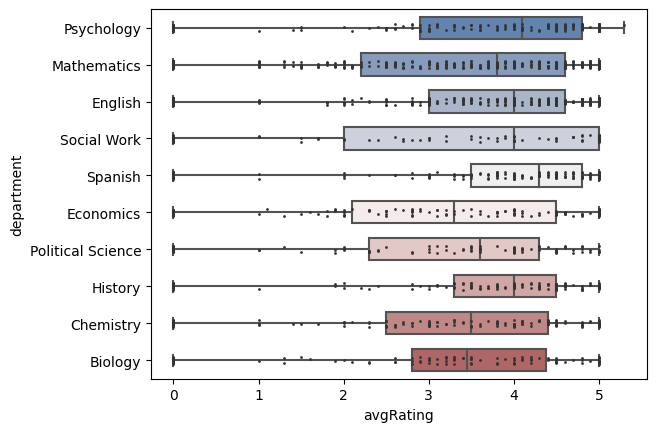

In [10]:

sns.boxplot(x='avgRating', y='department', data=depart_sorted, whis=[0, 100], width=0.6, palette='vlag')
sns.stripplot(x='avgRating', y='department', data=depart_sorted, size=2, color='0.2', linewidth=0)

In [11]:
departs.groupby('department').mean().sort_values('avgRating', ascending=False)

,avgRating
department,
Spanish,3.802516
Psychology,3.523243
History,3.509231
English,3.449451
Social Work,3.294737
Mathematics,3.252506
Biology,3.227660
Chemistry,3.161702
Economics,3.144444


Second sample investigates the relationship between average comment length for a professor with the professor's average rating. One common observations in marketing is that when people write good reviews they tend to write less for high ratings, but when they give bad reviews they write more as it's easier to find reasons to complain. We want to verify if this is true for our professor ratings.

From the graph, it's clear that there is no apparent relationship between average comment length and average rating. For all rating levels, the average comment length is clustered around 20-60 words. Looking at ratings of 5, we can find average student comments as short as 0 words in length and as long as over 70 words. It's interesting that when students decide to give the highest rating for a professor, some of them still write long comments to explain why they enjoy the professor's class. We think this indicates that the students have true reasons to like the hot professors which are reflected in their comment, as compared to typical evluation where they just give high scores without reasons. We can thus say that even though ratings on RateMyProfessor.com are subjective, they are more authentic in reflecting student opinions.

<AxesSubplot: xlabel='commentLength', ylabel='avgRating'>

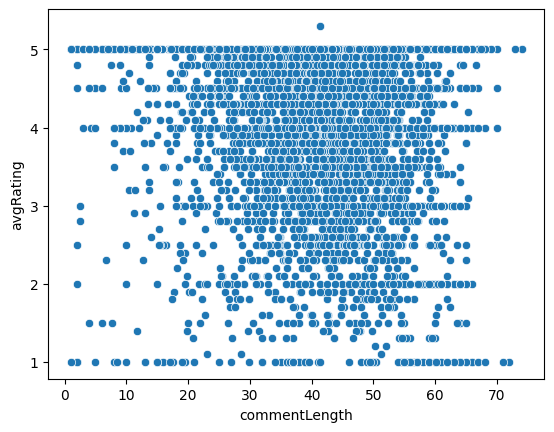

In [12]:
df_comment['commentLength'] = df_comment['comment'].str.split(" ").str.len()
rating_len = pd.merge(df_comment, df_prof, how='inner', left_on = 'profID', right_on = 'profID')
rating_len_group = rating_len.groupby(['profID'])['commentLength'].mean()
combined = pd.merge(df_prof, rating_len_group, how='inner', left_on = 'profID', right_on = 'profID')
sns.scatterplot(x = 'commentLength', y = 'avgRating', data=combined)

### Method
TODO